In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 읽기

first_file_name =  '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv'
last_file_name =  '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'

df_first = pd.read_csv(first_file_name,  encoding='cp949')
df_last = pd.read_csv(last_file_name,  encoding='cp949')


In [3]:

# 데이터 살펴보기
print(df_first.head())
print(df_first.info())
print(df_first.describe())
print(df_first.dtypes)
print(df_first.isna().sum())



   지역  2013년12월  2014년1월  2014년2월  2014년3월  2014년4월  2014년5월  2014년6월   
0  서울     18189    17925    17925    18016    18098    19446    18867  \
1  부산      8111     8111     9078     8965     9402     9501     9453   
2  대구      8080     8080     8077     8101     8267     8274     8360   
3  인천     10204    10204    10408    10408    10000     9844    10058   
4  광주      6098     7326     7611     7346     7346     7523     7659   

   2014년7월  2014년8월  ...  2014년11월  2014년12월  2015년1월  2015년2월  2015년3월   
0    18742    19274  ...     20242     20269    20670    20670    19415  \
1     9457     9411  ...      9208      9208     9204     9235     9279   
2     8360     8370  ...      8439      8253     8327     8416     8441   
3     9974     9973  ...     10020     10020    10017     9876     9876   
4     7612     7622  ...      7752      7748     7752     7756     7861   

   2015년4월  2015년5월  2015년6월  2015년7월  2015년8월  
0    18842    18367    18374    18152    18443  
1     9327  

In [4]:

# 데이터 살펴보기
print(df_last.head())
print(df_last.info())
print(df_last.describe())
print(df_last.dtypes)
print(df_last.isna().sum())


  지역명               규모구분    연도   월 분양가격(㎡)
0  서울                 전체  2015  10    5841
1  서울         전용면적 60㎡이하  2015  10    5652
2  서울   전용면적 60㎡초과 85㎡이하  2015  10    5882
3  서울  전용면적 85㎡초과 102㎡이하  2015  10    5721
4  서울        전용면적 102㎡초과  2015  10    5879
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB
None
                연도            월
count  4335.000000  4335.000000
mean   2017.352941     6.764706
std       1.234035     3.518361
min    2015.000000     1.000000
25%    2016.000000     4.000000
50%    2017.000000     7.000000
75%    2018.000000    10.000000
max    2019.000000    12.000000
지역명        object
규모구분       obj

In [5]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

# errors
# - ignore: 변경할 수 없는 데이터면 -> 원본 데이터 그대로 반환
# - coerce: 변경할 수 없는 데이터면 -> NaN으로 반환된다. 
# - raise: numeric으로 변경할 수 없는 경우 오류가 발생하며 작업 중단

In [6]:
df_last['분양가격'].dtypes

dtype('float64')

In [7]:
df_last['평당분양가격'] = df_last['분양가격'] *3.3 #(1평=>3.3m2)

In [8]:
df_last.head(5)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [9]:
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [10]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [11]:
# array(['전체', ' 60㎡', '60㎡~85㎡', '85㎡~102㎡','102㎡~'], dtype=object)
df_last['규모구분'] = df_last['규모구분'].replace({'전용면적 60㎡이하': ' 60㎡', '전용면적 60㎡초과 85㎡이하': '60㎡~85㎡', '전용면적 85㎡초과 102㎡이하': '85㎡~102㎡', '전용면적 102㎡초과': '102㎡~'})
print(df_last['규모구분'].unique())



['전체' ' 60㎡' '60㎡~85㎡' '85㎡~102㎡' '102㎡~']


In [12]:
# 규모구분 데이터에서 강사코드 
# (1) 전용면적,이하 문자열을 제거하고
# (2) 초과 문자열을 ~로 변경
# (3) 빈 문자열 제거
# array(['전체', '60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object)

df_last['전용면적'] = df_last['규모구분'].str.replace("전용면적", "")
df_last['전용면적'] = df_last['전용면적'].str.replace("이하", "")
df_last['전용면적'] = df_last['전용면적'].str.replace("초과", "~")
df_last['전용면적'] = df_last['전용면적'].str.replace(" ", "")

df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [13]:
df_last = df_last.drop(['분양가격(㎡)', '규모구분'], axis=1)
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [16]:
df_last.groupby(["지역명"])['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [17]:

# 전용면적별 평당분양가격의 평균값은 어떻게 될까?
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [19]:
#지역명이 인덱스 연도별이 컬럼 -> 연도별 평당 분양가격의 평균값은?

df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


In [20]:
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [24]:
df_last.pivot =pd.pivot(df_last, index=['전용면적'], columns=['연도'],values=['평당분양가겨'])

df_last.pivot



KeyError: "None of [Index(['평당분양가겨'], dtype='object')] are in the [columns]"

In [25]:
df_last_pivot = pd.pivot_table(df_last, index=['전용면적'], columns=['연도'], values='평당분양가격')
print(df_last_pivot)


연도               2015          2016          2017          2018          2019
전용면적                                                                         
102㎡~     9837.226667  10388.728272  11334.484615  11445.574576  13331.520968
60㎡       8951.525000   9398.876119  10246.133333  10844.409783  11506.803371
60㎡~85㎡   8891.817647   9295.986765   9825.000000  10650.611823  11677.201531
85㎡~102㎡  9518.506250  10122.355435  10540.402454  11441.707895  12980.676923
전체        8893.047059   9293.042647   9901.270588  10675.825123  11602.715816


<Axes: xlabel='전용면적'>

c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from

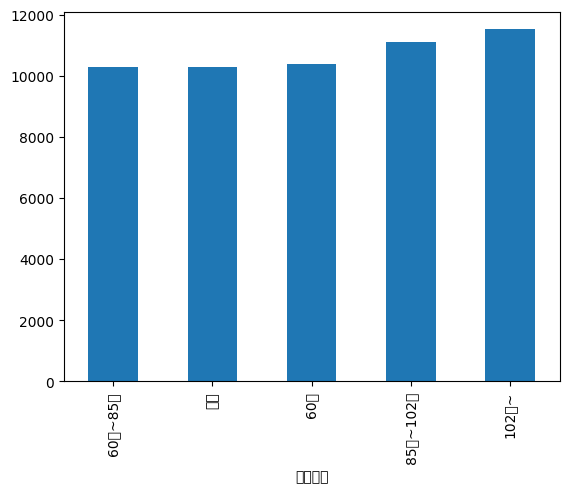

In [26]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().sort_values().plot.bar()

In [27]:
df_last.groupby(['연도'])['평당분양가격'].mean().plot


<Axes: >

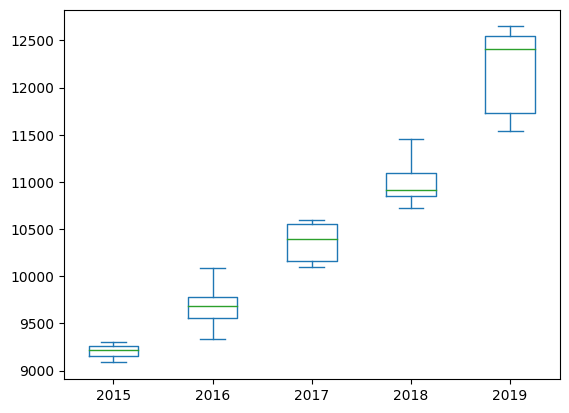

In [28]:
df_last.pivot_table(index='월', columns='연도', values='평당분양가격').plot.box()

<Axes: >

c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13217 (\N{SQUARE M SQUARED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph

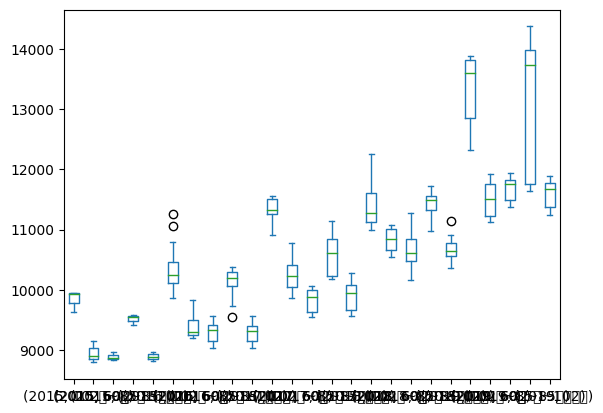

In [30]:
df_last.pivot_table(index='월', columns=['연도','전용면적'], values='평당분양가격').plot.box()

<Axes: xlabel='월'>

c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarnin

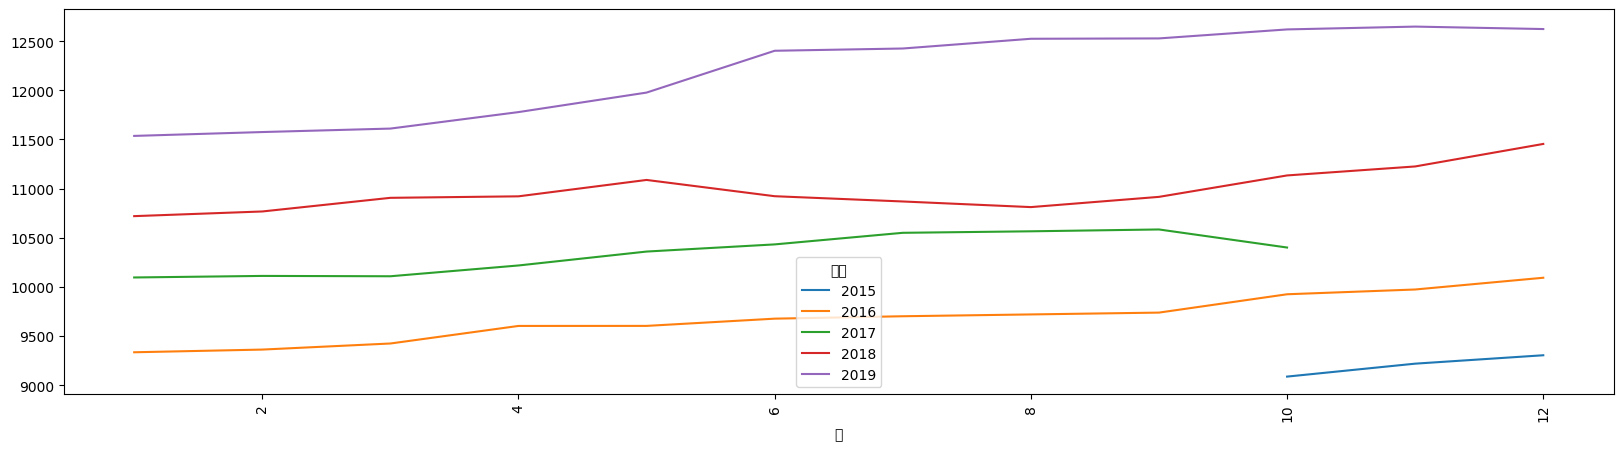

In [31]:
# 연도별 월에 따른 평당분양가격 변화 추이
df_last.pivot_table(index="월", columns=["연도"], values="평당분양가격").plot(figsize=(20,5), rot=90)

<Axes: xlabel='지역명', ylabel='평당분양가격'>

c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\enter\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from

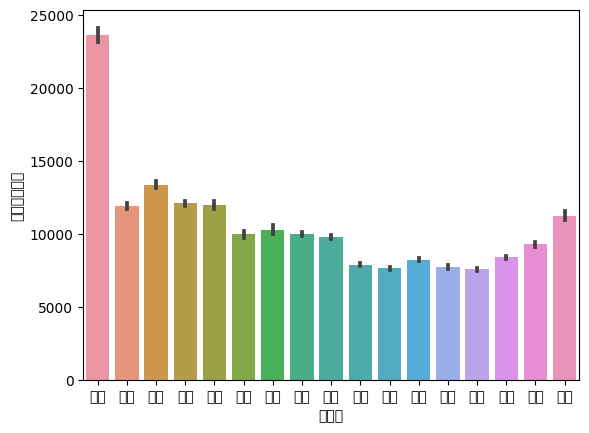

In [32]:
sns.barplot(data=df_last, x='지역명', y="평당분양가격")

In [34]:
max_price = df_last['평당분양가격'].max()


In [37]:

df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
typing.Literal[<no_default>],,,,,,
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


In [38]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
typing.Literal[<no_default>],,,,,,
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡


In [39]:
# 가로 방향의 데이터 프레임 => 세로 방향으로 전환
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name="평당분양가격")
df_first_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [42]:
# 2013년1월
# 2013년2월

date = "2013년12월"

# 숫자 데이터만 표현
year = date.split("년")[0]

month = date.split("년")[1].replace("월", "")
print(year, month)

2013 12


In [45]:
def parse_year(date):
    year = date.split('년')[0]
    return year


def parse_month(date):
    month = date.split('년')[1].replace('월','')
    return month



In [46]:
#기간 컬럼에서 => 년,월로 데이터를 각각 컬럼 별로 분리

df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)


In [47]:
df_first_melt

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [48]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
typing.Literal[<no_default>],,,,,,
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡


In [50]:
# df_last에서 전용면적이 '전체'인 데이터만 가져오시오.
# 단, 컬럼은 지역명, 연도, 월, 평당분양가격만 가져오시오.
df_last[df_last['전용면적'] == "전체"][['지역명', '연도', '월', '평당분양가격']]

df_last.loc[df_last['전용면적'] == "전체", ['지역명', '연도', '월', '평당분양가격']]

,지역명,연도,월,평당분양가격
typing.Literal[<no_default>],,,,
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
